## Tarea 1 - Fuerza Centrífuga y la Dirección de la Caída Libre (Capítulo 9, Taylor)

**Fecha de Entrega:** Hasta las 23:59 horas del miércoles 23 de agosto de 2023.

**Formato de Entrega:** Únicamente archivos en formato PDF, con los nombres, apellidos y código.

1. Calcular la dependencia del ángulo $\alpha$ con la latitud. Graficar $\alpha$ en función de la latitud geográfica ($-90^\circ$, $90^\circ$). Interprete físicamente los resultados. Presente su discusión comentando lo que ocurre en cinco ciudades ubicadas en latitudes que ayuden a la interpretación de los resultados.

2. Cálculo de $\alpha_{\text{max}}$. Demuestre que en aproximación de primer orden, $\alpha_{\text{max}}$ se puede expresar como:  
$$
\alpha_{\text{max}} = \frac{\Omega^2 \cdot R^3}{2GM}
$$

3. Hallar el ángulo de máxima desviación respecto a la vertical (en segundos, minutos o grados de arco, según sea el caso) para el Sol, Júpiter, Tierra, Marte, la Luna y una estrella de neutrones. Presente los resultados en una tabla donde se vean los parámetros físicos (con sus respectivas unidades) necesarios para calcular $\alpha$: $\Omega$, radio, etc.


# Solucion

### 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math



In [2]:
# Initial data
latitudes = np.linspace(-90, 90, 1000) # Latitudes in arcseconds
Omega = 7.2921150e-5  # Angular velocity of Earth (rad/s)
R = 6371e3  # Earth's radius (m)
g = 9.8  # Acceleration due to gravity (m/s^2)
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M_e = 5.97219e24  # Earth's mass (kg)




In [3]:
# Function to calculate the alpha angle
def alpha(lat):
    rad = np.arctan( (Omega**2 * R *  np.cos(lat * np.pi / 180)**2) / (g - Omega**2 * R * np.sin(lat * np.pi / 180) * np.cos(lat * np.pi / 180)) )
    deg = rad * 180 / np.pi
    arcsec = deg * 3600
    return arcsec



In [4]:
# Important cities with latitude for the graph
cities_list = [
    {"Latitude": 59, "City": "Estocolmo"},
    {"Latitude": 40, "City": "Nueva York"},
    {"Latitude": 31, "City": "El Cairo"},
    {"Latitude": 19.4, "City": "Ciudad de México"},
    {"Latitude": 8.98, "City": "Ciudad de Panamá"},
    {"Latitude": -0.18, "City": "Quito"},
    {"Latitude": -12, "City": "São Paulo"},
    {"Latitude": -23, "City": "Sídney"},
    {"Latitude": -33, "City": "Ciudad del Cabo"},
    {"Latitude": -55, "City": "Puerto Williams"},
]



In [5]:
# Create a DataFrame with calculated alpha values
df = pd.DataFrame(cities_list)
df['Alpha'] = df['Latitude'].apply(alpha)


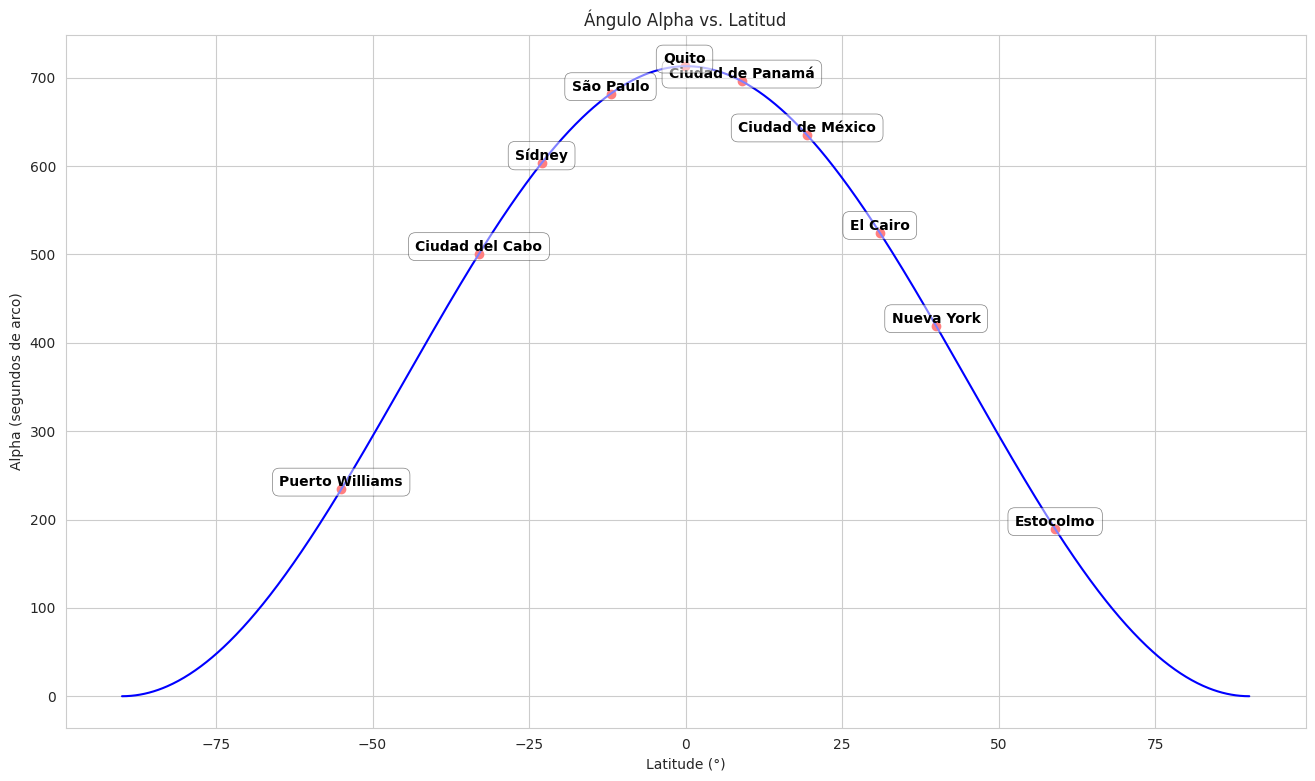

In [6]:
# Plotting the graph
sns.set_style('whitegrid')
plt.figure(figsize=(16, 9))
plt.plot(latitudes, alpha(latitudes), color='blue')
plt.scatter(df['Latitude'], df['Alpha'], color='red')

# Add labels for each city point
for index, row in df.iterrows():
    plt.text(
        row['Latitude'], row['Alpha'] + 0.2 , row['City'],
        fontsize=10, color='black', weight='bold',  # Adding 'weight' parameter
        horizontalalignment='center', verticalalignment='bottom',
        rotation_mode='anchor',
        bbox=dict(
            boxstyle='round', facecolor='white', alpha=0.5,
            edgecolor='black', pad=0.5, linewidth=0.5, linestyle='solid',
            joinstyle='round', capstyle='round'
        ),
        zorder=10, clip_on=True
    )

plt.xlabel('Latitude (°)')
plt.ylabel("Alpha (segundos de arco)")
plt.title('Ángulo Alpha vs. Latitud')
plt.savefig('alpha_vs_latitud.svg', format='svg', dpi=1200)
plt.show()

Podemos ver como para las ciudades mas cercanas a la latitud -45 en el sur como Puerto Williams y Ciudad del cabo, la desviacion esta en su maximo negativo de alrededor de 6 segundos de archo hacia el norte, y si nos vamos mas al sur de puerto williams, empezamos a disminuir en magnitud hasta que el polo sur, esta desviacion es de 0 grados, si nos vamos mas al norte empezamos a acercarnos nuevamente al 0 en el ecuador y de ahi empezamos a tener una desviacion en este caso hacia el sur aumentando hasta su maximo alrededor de nueva york y disminuyendo nuevamente a 0 hacia el polo norte.
Con esto podemos ver que ciudades muy grandes e importantes como Nueva York, el cairo y sidney tienen unas desviaciones muy altas por lo que los efectos de la misma dificilmente pueden ser ignorados, e incluso para ciudades que en principio parecen bastante cercanas al ecuador como lo es la ciudad de panama, tambien tienen una desviacion considerable.

### 2)

El cálculo de la desviación máxima, $ \alpha_{\text{max}} $, en presencia de fuerzas gravitacionales y centrífugas, se puede entender al considerar ambas fuerzas en un marco de referencia rotacional.

Para entender la desviación, consideremos un diagrama de fuerzas. Situemos el eje Y en la dirección radial y el eje X en la dirección tangencial. En este escenario, la fuerza gravitacional se alinea con el eje radial, mientras que la fuerza centrífuga tiene dos componentes:
1. En la dirección radial: $ F_{\text{centrífuga}} \cdot \cos{\lambda} $
2. En la dirección tangencial: $ F_{\text{centrífuga}} \cdot \sin{\lambda} $

Estamos interesados en la desviación del vector gravitacional, por lo que podemos omitir el componente radial de la fuerza centrífuga y enfocarnos en el componente tangencial. Así, la fuerza resultante en la dirección tangencial es:
$$ F_{\text{tangencial}} = F_{\text{centrífuga}} \cdot \sin{\lambda} = m \cdot R \cdot \Omega^2 \cdot \sin{\lambda} $$

La fuerza gravitacional que actúa sobre un objeto en la superficie de un planeta está dada por:
$$ F_{\text{gravedad}} = G \cdot \frac{m \cdot M}{R^2} $$
donde:
$ G $ es la constante de gravitación universal.
$ M $ es la masa del planeta.
$ R $ es el radio del planeta.

La desviación efectiva se describe por:
$$ \tan \alpha = \frac{F_{\text{tangencial}}}{F_{\text{gravedad}}} = \frac{R^3 \cdot \Omega^2 \cdot \sin{\lambda}}{G \cdot M} $$

Para obtener $ \alpha_{\text{max}} $, tomamos el valor maximo de la $F_{\text{tangencial}}$ el cual se da en sus polos donde $ \lambda = 90^{\circ} $, simplificando la expresión anterior a:
$$ \tan \alpha_{\text{max}} = \frac{R^3 \cdot \Omega^2}{G \cdot M} $$

Al aplicar la función arcotangente a ambos lados:
$$ \alpha_{\text{max}} = \arctan{\frac{R^3 \cdot \Omega^2}{G \cdot M}} $$

Al considerar la expansión en series de Taylor para la función arcotangente:
$$ \tan^{-1}(x) = x - \frac{x^3}{3} + \frac{x^5}{5} - \frac{x^7}{7} + \dots $$
y reteniendo solo el primer término, obtenemos:
$$ \tan^{-1}(x) \approx x $$
Por lo tanto:
$$ \alpha_{\text{max}} \approx \frac{R^3 \cdot \Omega^2}{G \cdot M} $$

### 3)

In [7]:

# Datos aproximados para los objetos
datos_objetos = [
    {"nombre": "Sol", "omega": 2 * math.pi / (25.38 * 24 * 3600), "radio": 6.9634e8, "masa": 1.989e30},
    {"nombre": "Júpiter", "omega": 2 * math.pi / (9.56 * 3600), "radio": 6.9911e7, "masa": 1.898e27},
    {"nombre": "Tierra", "omega": 2 * math.pi / (24 * 3600), "radio": 6.371e6, "masa": 5.972e24},
    {"nombre": "Marte", "omega": 2 * math.pi / (24.62 * 3600), "radio": 3.3895e6, "masa": 6.39e23},
    {"nombre": "Luna", "omega": 2 * math.pi / (27.32 * 24 * 3600), "radio": 1.7371e6, "masa": 7.342e22},
    {"nombre": "Estrella de neutrones", "omega": 2 * math.pi / 1.6e-3, "radio": 1.2e4, "masa": 2.8e30}
]



In [8]:
# Función para calcular el ángulo de máxima desviación (alpha_max)
def calcular_alpha_max(omega, radio, masa):
    G = 6.67430e-11  # Constante de gravitación universal en m^3/kg/s^2
    alpha_max =  ((omega**2 * radio**3) / (2*G * masa))
    return alpha_max

def radians_to_arcseconds(radians):
    degrees = radians * 180 / math.pi
    arcseconds = degrees * 3600
    return arcseconds



In [9]:
# Calcular los ángulos de máxima desviación y almacenar los resultados en una lista
resultados = []
for objeto in datos_objetos:
    alpha_max = calcular_alpha_max(objeto["omega"], objeto["radio"], objeto["masa"])
    alpha_max_arcseconds = radians_to_arcseconds(alpha_max)
    resultados.append({"Objeto": objeto["nombre"], "Ángulo de Máxima Desviación (segundos de arco)": round(radians_to_arcseconds(alpha_max), 4), "Angulo de Máxima Desviación (grados)": alpha_max_arcseconds / 3600, "Ángulo de Máxima Desviación (rad)":alpha_max, "Radio (km)": objeto["radio"] / 1000, "Masa (kg)": objeto["masa"], "Omega (rad/s)": objeto["omega"]})


In [10]:
# Crear un DataFrame de pandas a partir de la lista de resultados
df = pd.DataFrame(resultados)

# Exportar los resultados a un archivo CSV
df.to_csv("resultados_alpha_max.csv", index=False)

print("Resultados exportados a resultados_alpha_max.csv")

Resultados exportados a resultados_alpha_max.csv


In [11]:
df

,Objeto,Ángulo de Máxima Desviación (segundos de arco),Angulo de Máxima Desviación (grados),Ángulo de Máxima Desviación (rad),Radio (km),Masa (kg),Omega (rad/s)
0,Sol,2.1536,0.000598,0.000010,696340.0,1.989000e+30,0.000003
1,Júpiter,9271.8992,2.575528,0.044951,69911.0,1.898000e+27,0.000183
2,Tierra,353.8545,0.098293,0.001716,6371.0,5.972000e+24,0.000073
3,Marte,473.2320,0.131453,0.002294,3389.5,6.390000e+23,0.000071
4,Luna,0.7817,0.000217,0.000004,1737.1,7.342000e+22,0.000003
5,Estrella de neutrones,14706.0112,4.085003,0.071297,12.0,2.800000e+30,3926.990817


In [12]:
print(radians_to_arcseconds(0.001))

206.26480624709635
